# Histogram Equalization


In [182]:
import matplotlib.pyplot as plt
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

cameraman = imread('data/cameraman.jpg')
peppers = imread('data/peppers.png')
astronaut_grayscale = rgb2gray(astronaut())


In [183]:
# implementation of histogram function
def histogram(image : np.ndarray, number_bins : int) -> tuple:
    #normalize and flatten image
    image -= np.min(image)
    image = image/ np.max(image)
    image = image.flatten()
    # get array of bin edges (equidistant)
    bins = np.linspace( np.min(image), np.max(image), number_bins+1).reshape((-1,1))
    # create the cumulative histogram by counting all pixels smaller than the binedge
    # get the histogram by taking the differences
    hist = np.diff(np.sum( image < bins, axis = 1 ))
    # edge case: for the last hist value the values == 1
    # must be counted explicitly
    hist[-1] += np.sum(image == 1)
    return hist, bins.T

# test comparing our histogram function to the numpy version
# they should coincide when applied to normalized images
def test_histogram():
    #different number of bins and image size
    for i in range(10,50):
        # length of test image
        im_len = int(np.random.uniform(1,4)*i)
        # random noise image
        im = np.random.uniform(0,1,im_len)
        im -= np.min(im)
        im = im/ np.max(im)

        assert histogram(im, number_bins = i)[0].all() == np.histogram(im, bins = i)[0].all()
        assert histogram(im, number_bins = i)[1].all() == np.histogram(im, bins = i)[1].all()
    print('Tests passed!')

def hist_equalize(image : np.ndarray, number_bins : int) -> np.ndarray:
    # normalize image
    image -= np.min(image)
    image = image/ np.max(image)
    # get histogram
    hist, bins = histogram(image, number_bins)
    # convert the image values to indices of the bin edges
    bin_indices = np.floor(image*(number_bins-1)).astype(int)
    return np.cumsum(hist)[bin_indices]
    


In [184]:
test_histogram()

Tests passed!


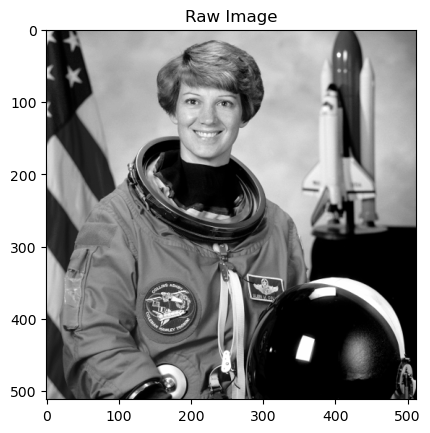

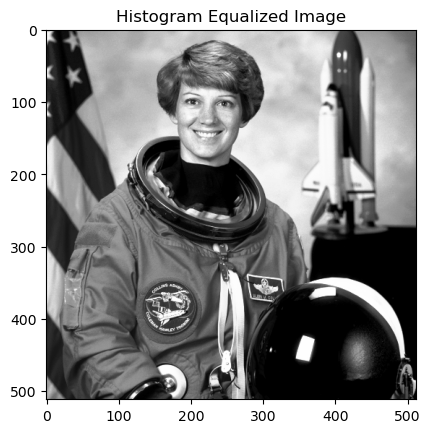

In [207]:
plt.imshow(astronaut_grayscale,cmap='gray')
plt.title('Raw Image')
plt.show()

image = hist_equalize(astronaut_grayscale,number_bins=200)
plt.imshow(image,cmap='gray')
plt.title('Histogram Equalized Image')
plt.show()

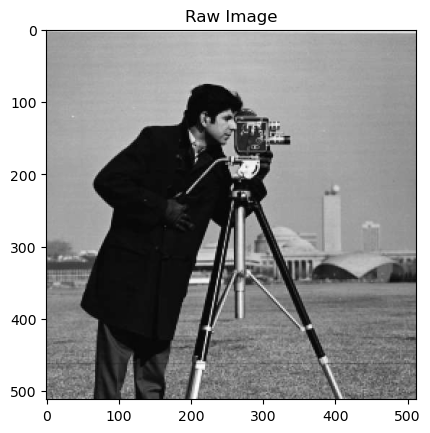

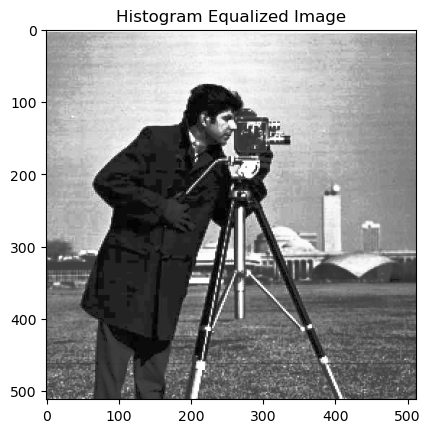

In [205]:
plt.imshow(cameraman,cmap='gray')
plt.title('Raw Image')
plt.show()

image = hist_equalize(cameraman,number_bins=200)
plt.imshow(image,cmap='gray')
plt.title('Histogram Equalized Image')
plt.show()

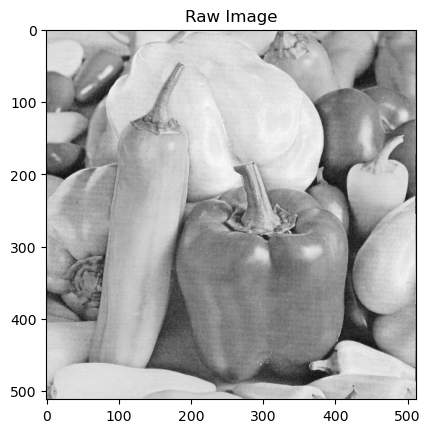

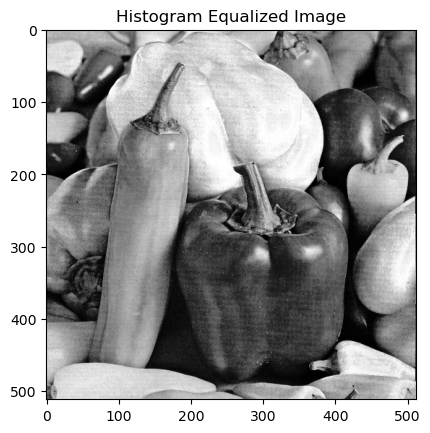

In [206]:
plt.imshow(peppers,cmap='gray')
plt.title('Raw Image')
plt.show()

image = hist_equalize(peppers,number_bins=200)
plt.imshow(image,cmap='gray')
plt.title('Histogram Equalized Image')
plt.show()